In [12]:
import pandas as pd
import numpy as np 
import time
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score     
from sklearn.model_selection import train_test_split 
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingRegressor 
from matplotlib.pyplot import MultipleLocator
from sklearn.model_selection import RandomizedSearchCV
import warnings
import os 
import string 
import torch
warnings.filterwarnings("ignore")

In [13]:
# Read data
df = pd.read_excel('../../Feature_CO.xlsx', sheet_name= "ML_features")
features = df.iloc[:,:-1]
target_CO = df.iloc[:,-1]

# Hyperparameter tuning

In [14]:
# Instantiate regressor algorithms
GBR = GradientBoostingRegressor(random_state=42)
model = GBR

# Feature normalization (standardize the descriptor)
features = (features - features.mean(axis=0)) / features.std(axis=0)
X_train, X_test, y_train, y_test = train_test_split(features, target_CO, train_size= 0.8, random_state=45)       

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

model_grid = {'loss':['ls', 'lad', 'huber', 'quantile'],
             'n_estimators': [10,50,100],
             'learning_rate':[0.05, 0.1, 0.15],
             'max_depth':[2,3,4],
             'min_samples_split':[2,3,5],
             'min_samples_leaf':[1,2,4]}
model.get_params().keys()

model_grid_cv = RandomizedSearchCV(estimator=model,
                        param_distributions=model_grid,
                        n_iter=100,
                        cv=10,
                        verbose= True)
model_grid_cv.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': [2, 3, 4],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [10, 50, 100]},
                   verbose=True)

In [15]:
model_optimized = model_grid_cv.best_estimator_
# print (model_optimized)

# feature importance 

In [16]:
headers = features.columns.values.tolist()
headers[0]
len(headers)
# headers
headers

['$\\mathregular{χ_{NM(0-3)}}$',
 '$\\mathregular{r_{NM(0-3)}}$',
 '$\\mathregular{m_{NM(0-3)}}$',
 '$\\mathregular{χ_{NM(3-4)}}$',
 '$\\mathregular{r_{NM(3-4)}}$',
 '$\\mathregular{m_{NM(3-4)}}$',
 '$\\mathregular{χ_{NM(4-5)}}$',
 '$\\mathregular{r_{NM(4-5)}}$',
 '$\\mathregular{m_{NM(4-5)}}$',
 '$\\mathregular{χ_{NM(0-3)}}$-$\\mathregular{χ_{M}}$',
 '$\\mathregular{χ_{NM(3-4)}}$-$\\mathregular{χ_{M}}$',
 '$\\mathregular{χ_{NM(4-5)}}$-$\\mathregular{χ_{M}}$',
 'Z',
 '$\\mathregular{r_{M}}$',
 '$\\mathregular{m_{M}}$',
 '$\\mathregular{G_{M}}$',
 '$\\mathregular{e_{d}}$',
 '$\\mathregular{χ_{M}}$',
 'I1',
 '$\\mathregular{ε_{d}}$',
 '$\\mathregular{H_{of}}$',
 '$\\mathregular{EA_{M}}$']

22
[0.00738797 0.00790262 0.00877643 0.00932437 0.01327171 0.01329589
 0.0152915  0.02122226 0.0244473  0.02471717 0.0263542  0.03149409
 0.03234254 0.03248768 0.03885201 0.04586395 0.05336831 0.05542255
 0.08466213 0.08871997 0.14055264 0.22424269]
['$\\mathregular{m_{NM(0-3)}}$' '$\\mathregular{m_{NM(4-5)}}$' 'I1'
 '$\\mathregular{e_{d}}$' '$\\mathregular{χ_{NM(0-3)}}$'
 '$\\mathregular{r_{NM(0-3)}}$' '$\\mathregular{χ_{M}}$'
 '$\\mathregular{H_{of}}$' '$\\mathregular{χ_{NM(4-5)}}$'
 '$\\mathregular{G_{M}}$'
 '$\\mathregular{χ_{NM(4-5)}}$-$\\mathregular{χ_{M}}$'
 '$\\mathregular{r_{NM(4-5)}}$' '$\\mathregular{χ_{NM(3-4)}}$'
 '$\\mathregular{m_{NM(3-4)}}$' '$\\mathregular{ε_{d}}$'
 '$\\mathregular{r_{NM(3-4)}}$'
 '$\\mathregular{χ_{NM(3-4)}}$-$\\mathregular{χ_{M}}$'
 '$\\mathregular{EA_{M}}$' 'Z' '$\\mathregular{r_{M}}$'
 '$\\mathregular{χ_{NM(0-3)}}$-$\\mathregular{χ_{M}}$'
 '$\\mathregular{m_{M}}$']


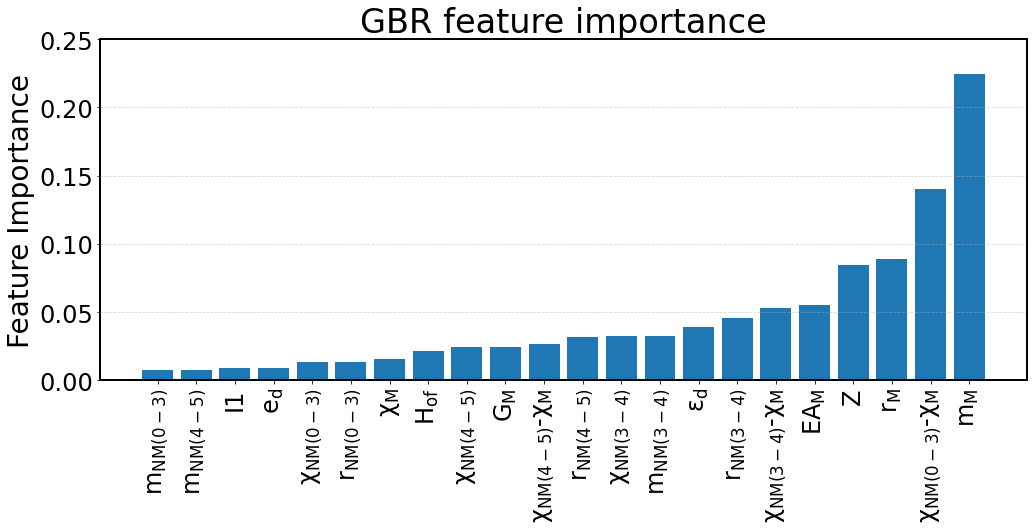

In [17]:
importances = model_optimized.feature_importances_
headers = headers 
print (len(headers))

sorted_idx = np.argsort(importances)
sorted_idx

importances_2 = importances[sorted_idx]
print (importances_2)

headers_2 = np.array(headers)[sorted_idx]
# headers = headers[len(headers)]
print (headers_2)

fig, ax = plt.subplots( figsize=(15, 8))


font={'weight':'normal', 
      'size': 28}
plt.rc('font', **font)


# ax.barh(importances_2,
#         headers_2,
#         height=0.7)

plt.bar(headers_2, importances_2,)

# ax.set_xlabel("Feature Importance", fontsize = 28)
ax.set_ylabel("Feature Importance", fontsize = 28)
ax.tick_params(axis='y', )
ax.tick_params(axis='x', rotation = 90)

plt.tick_params(labelsize=24)

ax.spines['bottom'].set_linewidth(2);
ax.spines['left'].set_linewidth(2);  
ax.spines['right'].set_linewidth(2); 
ax.spines['top'].set_linewidth(2); 
plt.title('GBR feature importance')
# plt.title('$\mathregular{χ_{NM}}$(4-5)-χ_M')
plt.grid(axis='y', ls='--', alpha=0.5)


ax.set_ylim(0, 0.25)

plt.tight_layout()
fig.savefig('Feature importance_all-heng.jpeg', dpi=600,)

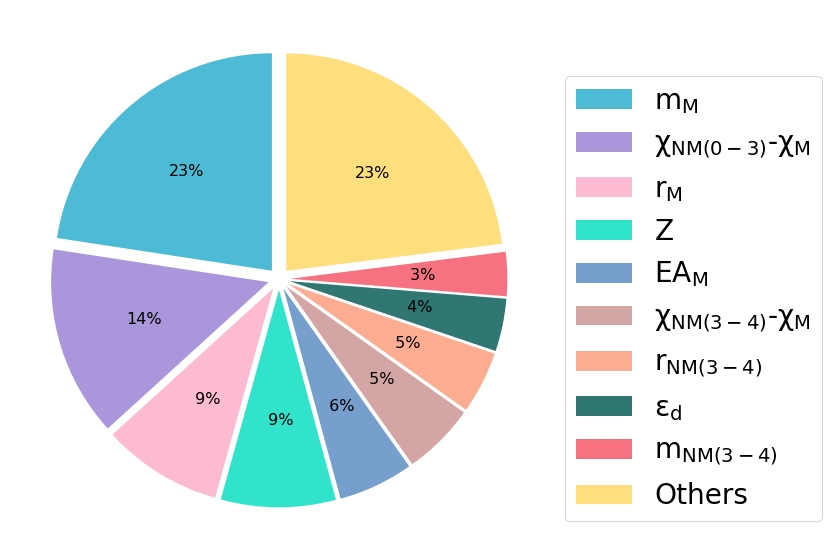

In [18]:
# Feature Importance Pie Chart

# Sort the indices based on feature importances
sorted_idx = np.argsort(importances)

# Get the sorted importances
importances_2 = importances[sorted_idx]

# Number of features to display in the pie chart
feature_numbers = 21

# Sort feature importances and get the top indices
feature_idx = (-model_optimized.feature_importances_).argsort()[:feature_numbers]

# Get the names of the top features
name_features = np.array(headers)[feature_idx]

# Get the feature importances of the selected features
selected_features = model_optimized.feature_importances_[feature_idx]

# Only display the top ten features and combine the rest into 'Others'
top_sizes = selected_features[:9]
top_labels = name_features[:9]

other_label = 'Others'
other_size = sum(selected_features[9:])

# Prepare data for the pie chart
labels_to_plot = np.append(top_labels, [other_label])
sizes_to_plot = np.append(top_sizes, [other_size])

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(15, 10))
wedges, texts, autotexts = plt.pie(sizes_to_plot, 
                                   colors=['#4DBBD5', '#aa96da', '#FCBAD3', '#30e3ca', '#769fcd', 
                                           '#d4a5a5', '#fbac91', '#307672', '#f67280', '#ffde7d'],
                                   explode=[0.05]*10,
                                   startangle=90,
                                   textprops={'weight': 'normal', 'size': 16},
                                   autopct='%2.f%%',
                                  )

# Add legend with labels and adjust the position
ax.legend(labels_to_plot, bbox_to_anchor=(1, 0, 0, 0.9), fontsize=28, ncol=1)

# Save the figure
fig.savefig('Feature_importance.jpg', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


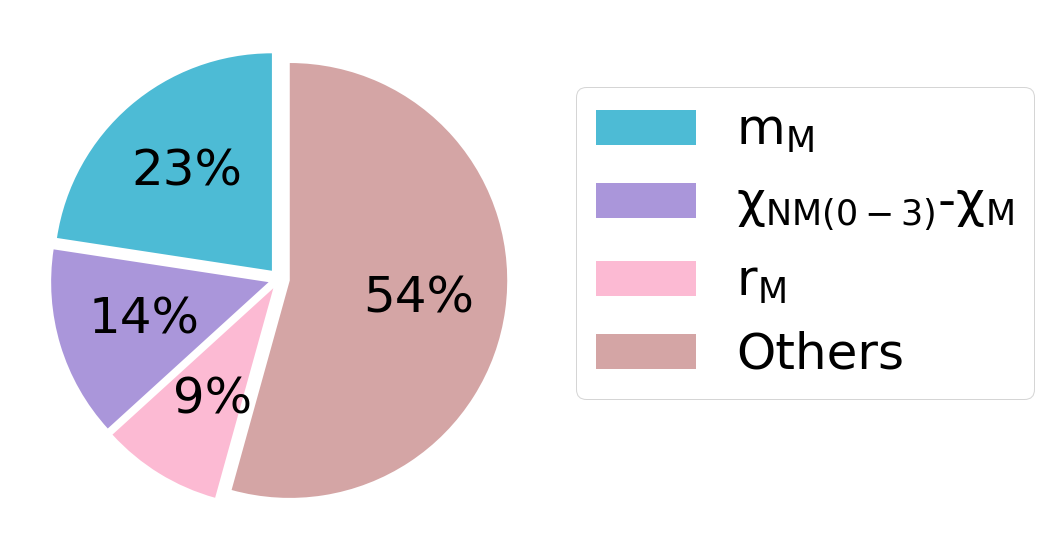

In [19]:
font={'weight':'normal', 
      'size': 50}

cmap = plt.get_cmap("tab20")

colors = cmap(np.arange(len(headers)))

labels= name_features  ## np.array(headers)[tree_importance_sorted_idx[3:]]
sizes= selected_features

#  不同块之间的分割
myexplode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
             0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
             0.05, 0.05,]

fig, ax = plt.subplots(figsize=(15, 10))

top_sizes = sizes[:3]
top_labels = labels[:3]



other_label = 'Others'
other_size = sum(sizes[3:])


labels_to_plot = np.append(top_labels, [other_label])
labels_to_plot

sizes_to_plot = np.append(top_sizes, [other_size])
sizes_to_plot



wedges,texts, autotexts = plt.pie(sizes_to_plot, 
#                                    colors=colors[:11], 
                                  colors=['#4DBBD5', '#aa96da','#FCBAD3', '#d4a5a5',],
                                   explode = myexplode[:4], 
                                   startangle=90, 
                                   textprops=font,
                                  autopct='%2.f%%',)


ax.legend(labels_to_plot, bbox_to_anchor=(1, 0, 0, 0.9), fontsize=50, ncol=1)

# plt.title('GBR feature importance', fontsize=28)
fig.savefig('Feature importance_top_3.jpg', dpi=600, bbox_inches='tight')
plt.show()

# Visualization of decision tree 

In [20]:
# from sklearn.datasets import make_regression
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# # Get feature names from the dataset
# headers = features.columns.values.tolist()

# # Set font size for plots
# font = {'size': 20}
# plt.rc("font", **font)

# # Get the first decision tree in the ensemble
# first_tree = model_optimized.estimators_[0][0]

# # Get the leaf node indices of the tree
# leaf_node_indices = first_tree.apply(X_train)

# # Plot the decision tree
# plt.figure(figsize=(15, 10))
# plot_tree(first_tree, feature_names=headers, filled=True, impurity=True, proportion=True, rounded=True, node_ids=True, fontsize=8)

# # Get the leaves' index from the tree
# leaves = first_tree.apply(X_train) == -1

# # Get the matplotlib Patch objects representing the nodes in the tree plot
# patches = plt.gca().patches

# # Set the face color of the leaf nodes to red
# for node_id, patch in enumerate(patches):
#     if leaves[node_id]:
#         patch.set_facecolor('red')

# # Save the plot as an image
# # plt.savefig('tree_0.jpg', dpi=600, bbox_inches='tight')
# plt.show()


# 500 trials repeat 

In [21]:
# Initialize lists to store metrics for training and testing
R2_2nd = []
RMSE_2nd = []
R2_2nd_test = []
RMSE_2nd_test = []

# Run the experiment 500 times
print('--- start 500 trials repeat ---')
for i in range(500):
    # Randomly split data
    X_train, X_test, y_train, y_test = train_test_split(features, target_CO, train_size=0.8)
    
    # Predictions and evaluation for training set
    y_tr_pred = model_optimized.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_tr_pred, y_train))
    R_squr_train = r2_score(y_train, y_tr_pred)
    
    #print('RMSE for training (v2): {:.4f} eV'.format(rmse_train))
    #print('R^2 for train {:.4f}'.format(R_squr_train))
    
    # Store metrics for training set
    RMSE_2nd.append(rmse_train)
    R2_2nd.append(R_squr_train)
    
    # Predictions and evaluation for testing set
    y_te_pred = model_optimized.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_te_pred, y_test))
    R_squr_test = r2_score(y_test, y_te_pred)
    
    #print('RMSE for testing (v2): {:.4f} eV'.format(rmse_test))
    #print('R^2 for test {:.4f}'.format(R_squr_test))
    
    # Store metrics for testing set
    RMSE_2nd_test.append(rmse_test)
    R2_2nd_test.append(R_squr_test)

# Create DataFrames from the collected metrics
text1 = pd.DataFrame({'gbr-rmse': RMSE_2nd})
text2 = pd.DataFrame({'gbr-r2': R2_2nd})
text3 = pd.DataFrame({'gbr-rmse_test': RMSE_2nd_test})
text4 = pd.DataFrame({'gbr-r2_test': R2_2nd_test})

# Calculate and print average values for training set
avg_rmse_train = np.mean(RMSE_2nd)
avg_r2_train = np.mean(R2_2nd)

print('Average RMSE for training set: {:.3f} eV'.format(avg_rmse_train))
print('Average R^2 for training set: {:.3f}'.format(avg_r2_train))

# Calculate and print average values for testing set
avg_rmse_test = np.mean(RMSE_2nd_test)
avg_r2_test = np.mean(R2_2nd_test)

print('Average RMSE for testing set: {:.3f} eV'.format(avg_rmse_test))
print('Average R^2 for testing set: {:.3f}'.format(avg_r2_test))

--- start 500 trials repeat ---
Average RMSE for training set: 0.118 eV
Average R^2 for training set: 0.970
Average RMSE for testing set: 0.110 eV
Average R^2 for testing set: 0.966


In [24]:
# Concatenate DataFrames along columns
result_df = pd.concat([text1, text2, text3, text4], axis=1)

# Write the concatenated DataFrame to an Excel file
result_df.to_excel('GBR_500_trials_repeat_22D.xlsx', index=False)  